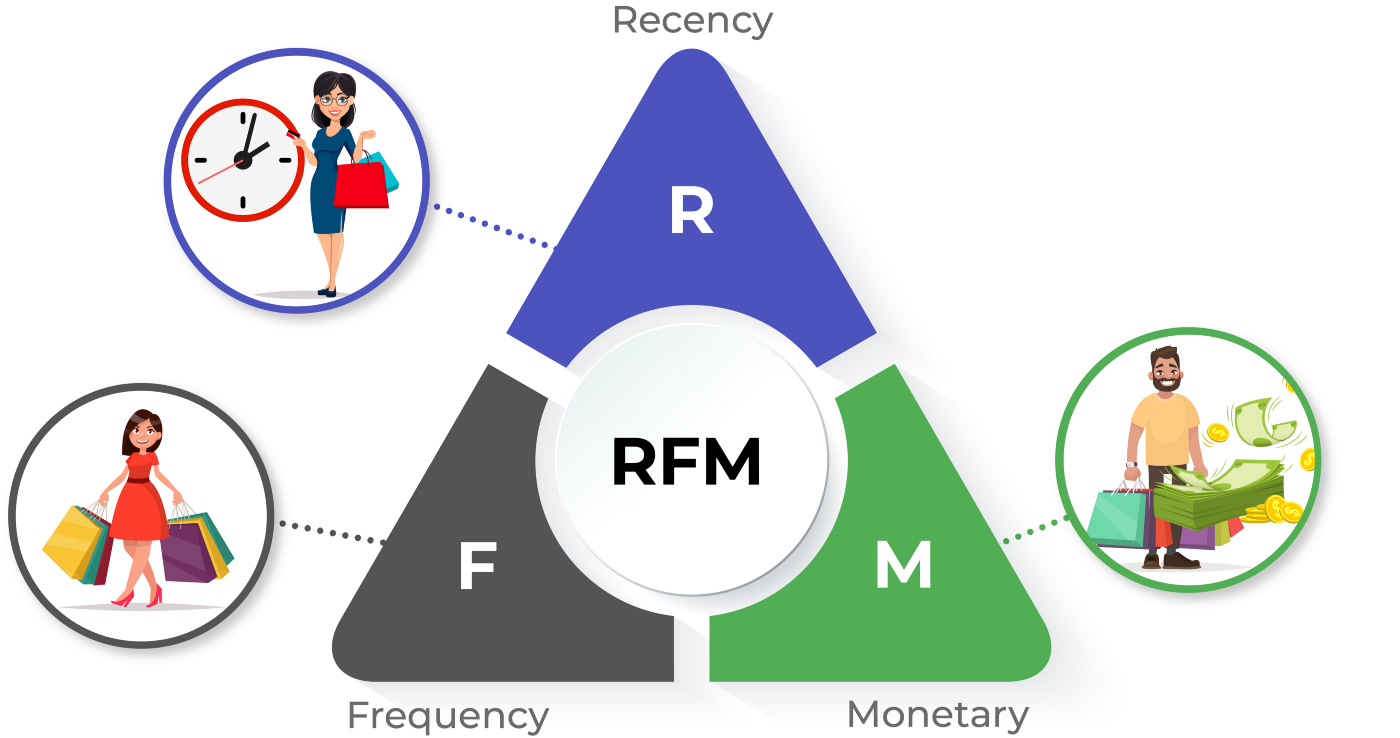

## What is RFM Analysis?

#### RFM (Recency, Frequency, Monetary) analysis is a marketing technique used to quantitatively rank and group customers based on their transactional behavior. The goal is to identify the most valuable customers, understand their behaviors, and tailor marketing strategies accordingly.

### Components of RFM:

- Recency (R): How recently a customer made a purchase.
- Frequency (F): How often a customer makes a purchase.
- Monetary (M): How much money a customer spends on purchases.

By scoring customers on these three dimensions, businesses can create customer segments for targeted marketing.

### Importance of RFM in Machine Learning:

- Customer Segmentation: Helps in identifying customer segments for personalized marketing.
- Customer Retention: Identifies at-risk customers and potential loyal customers.
- Profitability Analysis: Helps in recognizing high-value customers.
- Targeted Campaigns: Optimizes marketing efforts and budgets.

## Step 1: Data Collection

In [8]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
from warnings import filterwarnings
filterwarnings('ignore')

# Create a simulated dataset
np.random.seed(42)

# Parameters for simulation
n_customers = 1000
n_transactions = 5000
start_date = datetime(2023, 1, 1)
end_date = datetime(2024, 6, 1)

# Generate customer IDs
customer_ids = np.random.choice(range(1, n_customers + 1), n_transactions)

# Generate transaction dates
transaction_dates = [start_date + timedelta(days=np.random.randint((end_date - start_date).days)) for i in range(n_transactions)]

# Generate transaction amounts
transaction_amounts = np.round(np.random.uniform(5, 500, n_transactions), 2)

# Create DataFrame
data = pd.DataFrame({
    'CustomerID': customer_ids,
    'TransactionDate': transaction_dates,
    'TransactionAmount': transaction_amounts
})

data.head()


,CustomerID,TransactionDate,TransactionAmount
0,103,2023-01-27,266.65
1,436,2023-08-19,406.25
2,861,2023-11-17,369.08
3,271,2023-08-21,333.58
4,107,2024-03-12,61.13


In [9]:
data.shape

(5000, 3)

### Step 2: Data Preparation
Calculate Recency, Frequency, and Monetary values.

In [10]:
from datetime import date

In [11]:
date.today()

datetime.date(2025, 4, 25)

In [12]:
import datetime

# Reference date (today's date for the analysis)
reference_date = datetime.datetime.now()

# Aggregate data by CustomerID
rfm_data = data.groupby('CustomerID').agg({
    'TransactionDate': lambda x: (reference_date - x.max()).days,
    'CustomerID': 'count',
    'TransactionAmount': 'sum'
}).rename(columns={
    'TransactionDate': 'Recency',
    'CustomerID': 'Frequency',
    'TransactionAmount': 'Monetary'
})

rfm_data.head()


,Recency,Frequency,Monetary
CustomerID,,,
1,459,9,2218.11
2,369,6,659.62
3,403,4,781.65
4,350,2,448.56
5,352,5,1185.46


### Step 3: RFM Scoring
Assign scores based on Recency, Frequency, and Monetary values.

In [13]:
# Define RFM score functions
def r_score(x, quantiles):
    if x <= quantiles[0.2]:
        return 5
    elif x <= quantiles[0.4]:
        return 4
    elif x <= quantiles[0.6]:
        return 3
    elif x <= quantiles[0.8]:
        return 2
    else:
        return 1

def fm_score(x, quantiles):
    if x <= quantiles[0.2]:
        return 1
    elif x <= quantiles[0.4]:
        return 2
    elif x <= quantiles[0.6]:
        return 3
    elif x <= quantiles[0.8]:
        return 4
    else:
        return 5

# Calculate quantiles
recency_quantiles = rfm_data['Recency'].quantile([0.2, 0.4, 0.6, 0.8]).to_dict()
frequency_quantiles = rfm_data['Frequency'].quantile([0.2, 0.4, 0.6, 0.8]).to_dict()
monetary_quantiles = rfm_data['Monetary'].quantile([0.2, 0.4, 0.6, 0.8]).to_dict()

# Apply RFM scoring
rfm_data['R'] = rfm_data['Recency'].apply(r_score, args=(recency_quantiles,))
rfm_data['F'] = rfm_data['Frequency'].apply(fm_score, args=(frequency_quantiles,))
rfm_data['M'] = rfm_data['Monetary'].apply(fm_score, args=(monetary_quantiles,))

# Calculate RFM Score
rfm_data['RFM_Score'] = rfm_data['R'].map(str) + rfm_data['F'].map(str) + rfm_data['M'].map(str)

rfm_data.head()


,Recency,Frequency,Monetary,R,F,M,RFM_Score
CustomerID,,,,,,,
1,459,9,2218.11,2,5,5,255
2,369,6,659.62,4,3,2,432
3,403,4,781.65,3,2,2,322
4,350,2,448.56,5,1,1,511
5,352,5,1185.46,5,3,3,533


### Step 4: Customer Segmentation
Segment customers based on their RFM scores.

In [14]:
rfm_data[(rfm_data.R == 5)&(rfm_data.F == 5)].shape

(48, 7)

In [15]:
# Define segments based on RFM scores
def segment_customers(df):
    if df['RFM_Score'] == '555':
        return 'Champions'
    elif df['RFM_Score'][0] == '5':
        return 'Loyal Customers'
    elif df['RFM_Score'][1] == '5':
        return 'Potential Loyalists'
    elif df['RFM_Score'][2] == '5':
        return 'Big Spenders'
    elif df['RFM_Score'][0] == '1':
        return 'At Risk'
    else:
        return 'Others'

# Apply segmentation
rfm_data['Segment'] = rfm_data.apply(segment_customers, axis=1)

rfm_data.head()


,Recency,Frequency,Monetary,R,F,M,RFM_Score,Segment
CustomerID,,,,,,,,
1,459,9,2218.11,2,5,5,255,Potential Loyalists
2,369,6,659.62,4,3,2,432,Others
3,403,4,781.65,3,2,2,322,Others
4,350,2,448.56,5,1,1,511,Loyal Customers
5,352,5,1185.46,5,3,3,533,Loyal Customers


In [16]:
rfm_data.Segment.value_counts()

Segment
Others                 442
At Risk                183
Loyal Customers        161
Potential Loyalists     98
Big Spenders            63
Champions               42
Name: count, dtype: int64

### Step 5: Insights and Visualization
Visualize the segments and derive insights.

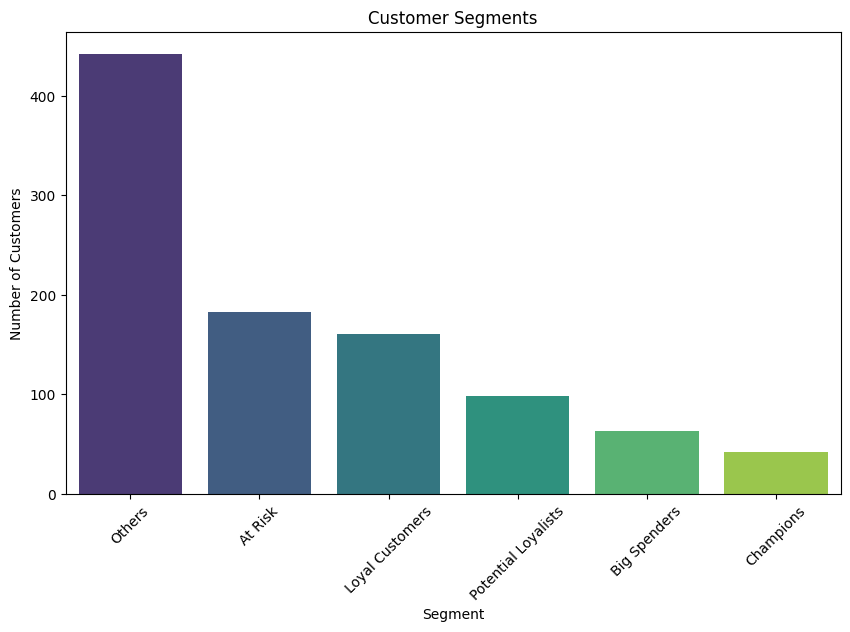

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

# Count of customers in each segment
segment_counts = rfm_data['Segment'].value_counts()

# Plot segment counts
plt.figure(figsize=(10, 6))
sns.barplot(x=segment_counts.index, y=segment_counts.values, palette='viridis')
plt.title('Customer Segments')
plt.xlabel('Segment')
plt.ylabel('Number of Customers')
plt.xticks(rotation=45)
plt.show()


### Step 6: Actionable Strategies
Develop marketing strategies tailored to each customer segment.

- Champions: Reward them with exclusive offers and early access to new products.
- Loyal Customers: Offer loyalty programs and incentives to encourage repeat purchases.
- Potential Loyalists: Nurture them with targeted promotions to convert them into loyal customers.
- Big Spenders: Offer premium services and personalized experiences.
- At Risk: Re-engage them with special offers and reminders.
- Others: Analyze and identify ways to move them into higher-value segments.


### We need to develop targeted strategies that focus on improving their engagement, frequency of purchases, and overall satisfaction. Here are some strategies and their implementations:

#### Strategy 1: Personalized Email Campaigns
Send personalized emails with product recommendations, special discounts, and relevant content to engage customers.

#### Strategy 2: Exclusive Offers and Discounts
Provide exclusive offers and discounts to encourage more frequent purchases.

#### Strategy 3: Loyalty Programs
Introduce or enhance loyalty programs to reward repeat purchases and long-term engagement.

#### Strategy 4: Feedback and Improvement
Gather customer feedback to understand their needs and improve products/services accordingly.

#### Strategy 5: Enhanced Customer Support
Offer exceptional customer support to build trust and satisfaction.

Let's start by simulating and analyzing the potential impact of these strategies.

#### Step 1: Identify "Others" Segment
Extract the customers who are currently in the "Others" segment.

In [18]:
# Extract "Others" segment
others_segment = rfm_data[rfm_data['Segment'] == 'Others']
others_segment.head()

,Recency,Frequency,Monetary,R,F,M,RFM_Score,Segment
CustomerID,,,,,,,,
2,369,6,659.62,4,3,2,432,Others
3,403,4,781.65,3,2,2,322,Others
14,491,4,811.37,2,2,2,222,Others
15,362,5,1069.48,4,3,3,433,Others
16,381,5,976.75,4,3,2,432,Others


In [19]:
others_segment.shape

(442, 8)

#### Step 2: Personalized Email Campaign
Simulate sending personalized emails and track engagement.

In [20]:
442*.3

132.6

In [21]:
np.random.choice([0, 1], size=len(others_segment), p=[0.7, 0.3])

array([1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,

In [22]:
# Simulate engagement rates
np.random.seed(42)
others_segment['Email_Engagement'] = np.random.choice([0, 1], size=len(others_segment), p=[0.7, 0.3])
email_engaged_customers = others_segment[others_segment['Email_Engagement'] == 1]

email_engaged_customers.head()

,Recency,Frequency,Monetary,R,F,M,RFM_Score,Segment,Email_Engagement
CustomerID,,,,,,,,,
3,403,4,781.65,3,2,2,322,Others,1
14,491,4,811.37,2,2,2,222,Others,1
20,400,7,1252.41,3,4,3,343,Others,1
26,384,5,1621.58,4,3,4,434,Others,1
29,413,7,1410.27,3,4,4,344,Others,1


In [23]:
email_engaged_customers.shape

(135, 9)

#### Step 3: Exclusive Offers and Discounts
Simulate providing exclusive offers and track purchases.

In [24]:
# Simulate purchase rates after offers
np.random.seed(42)
email_engaged_customers['Offer_Purchase'] = np.random.choice([0, 1], size=len(email_engaged_customers), p=[0.6, 0.4])
offer_purchase_customers = email_engaged_customers[email_engaged_customers['Offer_Purchase'] == 1]

offer_purchase_customers.head()


,Recency,Frequency,Monetary,R,F,M,RFM_Score,Segment,Email_Engagement,Offer_Purchase
CustomerID,,,,,,,,,,
14,491,4,811.37,2,2,2,222,Others,1,1
20,400,7,1252.41,3,4,3,343,Others,1,1
70,467,4,969.09,2,2,2,222,Others,1,1
72,443,4,1317.39,2,2,3,223,Others,1,1
77,413,2,614.20,3,1,1,311,Others,1,1


In [25]:
offer_purchase_customers.shape

(51, 10)

#### Step 4: Loyalty Programs
Simulate enrollment in loyalty programs and track repeat purchases.

In [26]:
# Simulate loyalty program enrollment and repeat purchases
np.random.seed(42)
offer_purchase_customers['Loyalty_Enrollment'] = np.random.choice([0, 1], size=len(offer_purchase_customers), p=[0.5, 0.5])
loyalty_enrolled_customers = offer_purchase_customers[offer_purchase_customers['Loyalty_Enrollment'] == 1]

loyalty_enrolled_customers.head()


,Recency,Frequency,Monetary,R,F,M,RFM_Score,Segment,Email_Engagement,Offer_Purchase,Loyalty_Enrollment
CustomerID,,,,,,,,,,,
20,400,7,1252.41,3,4,3,343,Others,1,1,1
70,467,4,969.09,2,2,2,222,Others,1,1,1
72,443,4,1317.39,2,2,3,223,Others,1,1,1
157,402,5,901.69,3,3,2,332,Others,1,1,1
195,354,5,1298.91,4,3,3,433,Others,1,1,1


#### Step 5: Feedback and Improvement
Simulate gathering feedback and making improvements.

In [27]:
# Simulate feedback collection and improved satisfaction
np.random.seed(42)
loyalty_enrolled_customers['Improved_Satisfaction'] = np.random.choice([0, 1], size=len(loyalty_enrolled_customers), p=[0.3, 0.7])
satisfied_customers = loyalty_enrolled_customers[loyalty_enrolled_customers['Improved_Satisfaction'] == 1]

satisfied_customers.head()


,Recency,Frequency,Monetary,R,F,M,RFM_Score,Segment,Email_Engagement,Offer_Purchase,Loyalty_Enrollment,Improved_Satisfaction
CustomerID,,,,,,,,,,,,
20,400,7,1252.41,3,4,3,343,Others,1,1,1,1
70,467,4,969.09,2,2,2,222,Others,1,1,1,1
72,443,4,1317.39,2,2,3,223,Others,1,1,1,1
157,402,5,901.69,3,3,2,332,Others,1,1,1,1
262,461,5,501.76,2,3,1,231,Others,1,1,1,1


#### Step 6: Enhanced Customer Support
Simulate the impact of enhanced customer support.

In [28]:
# Simulate customer support impact
np.random.seed(42)
satisfied_customers['Support_Impact'] = np.random.choice([0, 1], size=len(satisfied_customers), p=[0.2, 0.8])
retained_customers = satisfied_customers[satisfied_customers['Support_Impact'] == 1]

retained_customers.head()


,Recency,Frequency,Monetary,R,F,M,RFM_Score,Segment,Email_Engagement,Offer_Purchase,Loyalty_Enrollment,Improved_Satisfaction,Support_Impact
CustomerID,,,,,,,,,,,,,
20,400,7,1252.41,3,4,3,343,Others,1,1,1,1,1
70,467,4,969.09,2,2,2,222,Others,1,1,1,1,1
72,443,4,1317.39,2,2,3,223,Others,1,1,1,1,1
157,402,5,901.69,3,3,2,332,Others,1,1,1,1,1
534,430,2,237.11,3,1,1,311,Others,1,1,1,1,1


### Analysis of Impact
Compare the original "Others" segment with the improved segment.

In [29]:
# Original "Others" segment size
original_others_size = len(others_segment)

# Improved segment size
improved_segment_size = len(retained_customers)

print(f"Original 'Others' segment size: {original_others_size}")
print(f"Improved segment size: {improved_segment_size}")


Original 'Others' segment size: 442
Improved segment size: 9


### Visualize the Impact
Plot the impact of the strategies on customer segments.

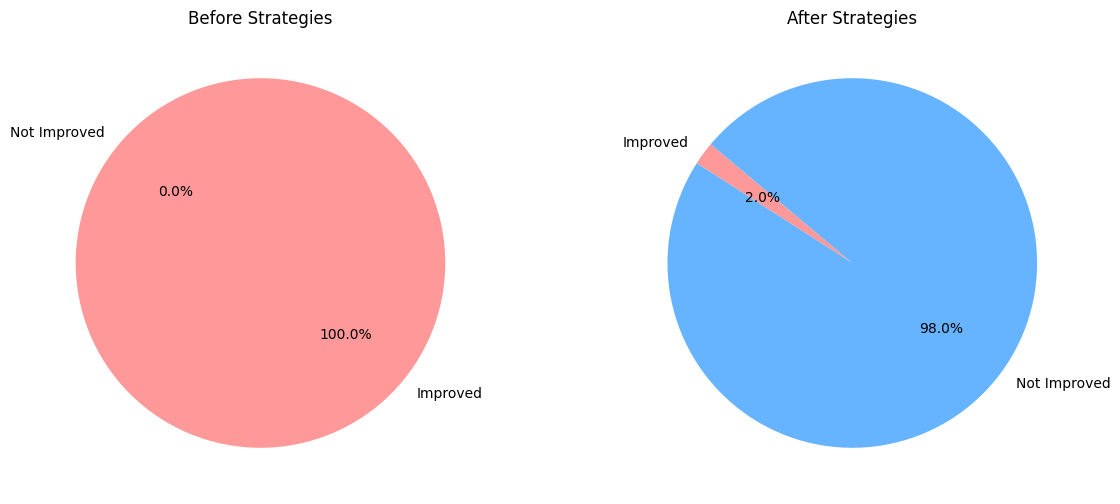

In [30]:
import matplotlib.pyplot as plt

# Plot segment sizes before and after strategies
segment_sizes_before = [original_others_size, len(others_segment) - original_others_size]
segment_sizes_after = [improved_segment_size, len(others_segment) - improved_segment_size]

labels = ['Improved', 'Not Improved']

fig, ax = plt.subplots(1, 2, figsize=(14, 6))
ax[0].pie(segment_sizes_before, labels=labels, autopct='%1.1f%%', startangle=140, colors=['#ff9999','#66b3ff'])
ax[0].set_title('Before Strategies')

ax[1].pie(segment_sizes_after, labels=labels, autopct='%1.1f%%', startangle=140, colors=['#ff9999','#66b3ff'])
ax[1].set_title('After Strategies')

plt.show()


#### Instead of randomly assigning the impact, we can use the RFM scores to determine the likelihood of customers moving to higher-value segments. We will prioritize customers with higher RFM scores within the "Others" segment.

In [31]:
others_segment

,Recency,Frequency,Monetary,R,F,M,RFM_Score,Segment,Email_Engagement
CustomerID,,,,,,,,,
2,369,6,659.62,4,3,2,432,Others,0
3,403,4,781.65,3,2,2,322,Others,1
14,491,4,811.37,2,2,2,222,Others,1
15,362,5,1069.48,4,3,3,433,Others,0
16,381,5,976.75,4,3,2,432,Others,0
...,...,...,...,...,...,...,...,...,...
987,427,6,1500.91,3,3,4,334,Others,1
989,396,4,591.06,3,2,1,321,Others,1
992,429,3,528.34,3,1,1,311,Others,0


#### Step 1: Calculate a Composite RFM Score
Combine the R, F, and M scores into a single composite score to rank customers within the "Others" segment.

In [32]:
# Calculate the composite RFM score
others_segment['Composite_RFM_Score'] = others_segment['R'] + others_segment['F'] + others_segment['M']

# Sort customers by Composite RFM Score in descending order
others_segment = others_segment.sort_values(by='Composite_RFM_Score', ascending=False)

others_segment.head()


,Recency,Frequency,Monetary,R,F,M,RFM_Score,Segment,Email_Engagement,Composite_RFM_Score
CustomerID,,,,,,,,,,
997,375,7,1657.27,4,4,4,444,Others,1,12
414,379,7,1502.45,4,4,4,444,Others,0,12
892,372,7,1753.60,4,4,4,444,Others,1,12
825,370,7,1801.08,4,4,4,444,Others,1,12
912,387,7,1716.81,4,4,4,444,Others,1,12


In [33]:
others_segment.Composite_RFM_Score.value_counts()

Composite_RFM_Score
10    74
9     62
5     61
6     58
8     54
7     52
11    35
4     34
12    12
Name: count, dtype: int64

#### Step 2: Assign Probabilities Based on Composite RFM Score
We can assign probabilities based on the rank of the composite RFM scores, ensuring that customers with higher scores have a higher likelihood of being moved to better segments.

In [34]:
others_segment['Composite_RFM_Score'] / others_segment['Composite_RFM_Score'].sum()

CustomerID
997    0.003517
414    0.003517
892    0.003517
825    0.003517
912    0.003517
         ...   
212    0.001172
458    0.001172
530    0.001172
44     0.001172
372    0.001172
Name: Composite_RFM_Score, Length: 442, dtype: float64

In [35]:
# Normalize the composite scores to get probabilities
others_segment['Probability'] = others_segment['Composite_RFM_Score'] / others_segment['Composite_RFM_Score'].sum()
others_segment.head()


,Recency,Frequency,Monetary,R,F,M,RFM_Score,Segment,Email_Engagement,Composite_RFM_Score,Probability
CustomerID,,,,,,,,,,,
997,375,7,1657.27,4,4,4,444,Others,1,12,0.003517
414,379,7,1502.45,4,4,4,444,Others,0,12,0.003517
892,372,7,1753.60,4,4,4,444,Others,1,12,0.003517
825,370,7,1801.08,4,4,4,444,Others,1,12,0.003517
912,387,7,1716.81,4,4,4,444,Others,1,12,0.003517


#### Step 3: Select Customers Based on Probabilities
Select a subset of customers based on these probabilities.

In [36]:
# Number of customers we want to move to higher segments
num_customers_to_improve = int(len(others_segment) * 0.3)  # Example: 30% of "Others" segment

# Select customers based on probabilities
selected_customers = others_segment.sample(n=num_customers_to_improve, weights='Probability')

selected_customers.head()


,Recency,Frequency,Monetary,R,F,M,RFM_Score,Segment,Email_Engagement,Composite_RFM_Score,Probability
CustomerID,,,,,,,,,,,
313,402,6,1578.76,3,3,4,334,Others,1,10,0.002931
669,423,5,1562.22,3,3,4,334,Others,0,10,0.002931
755,378,5,1366.24,4,3,3,433,Others,0,10,0.002931
257,382,4,1282.22,4,2,3,423,Others,0,9,0.002638
645,360,6,862.27,4,3,2,432,Others,0,9,0.002638


In [37]:
selected_customers.shape

(132, 11)

#### Step 4: Update RFM Scores for Selected Customers
Assume that these selected customers have responded positively to the strategies and update their RFM scores.

In [38]:
# Update RFM scores for the selected customers to reflect improved engagement
selected_customers['R'] = selected_customers['R'].apply(lambda x: max(1, x-1))  # Decrease recency score
selected_customers['F'] = selected_customers['F'].apply(lambda x: min(5, x+1))  # Increase frequency score
selected_customers['M'] = selected_customers['M'].apply(lambda x: min(5, x+1))  # Increase monetary score

# Recalculate RFM score and segment
selected_customers['RFM_Score'] = selected_customers['R'].map(str) + selected_customers['F'].map(str) + selected_customers['M'].map(str)
selected_customers['Segment'] = selected_customers.apply(segment_customers, axis=1)

selected_customers.head()

,Recency,Frequency,Monetary,R,F,M,RFM_Score,Segment,Email_Engagement,Composite_RFM_Score,Probability
CustomerID,,,,,,,,,,,
313,402,6,1578.76,2,4,5,245,Big Spenders,1,10,0.002931
669,423,5,1562.22,2,4,5,245,Big Spenders,0,10,0.002931
755,378,5,1366.24,3,4,4,344,Others,0,10,0.002931
257,382,4,1282.22,3,3,4,334,Others,0,9,0.002638
645,360,6,862.27,3,4,3,343,Others,0,9,0.002638


In [39]:
selected_customers.Segment.value_counts()

Segment
Others                 60
Big Spenders           35
At Risk                24
Potential Loyalists    13
Name: count, dtype: int64

In [40]:
selected_customers[selected_customers['Segment'] == 'Potential Loyalists']

,Recency,Frequency,Monetary,R,F,M,RFM_Score,Segment,Email_Engagement,Composite_RFM_Score,Probability
CustomerID,,,,,,,,,,,
29,413,7,1410.27,2,5,5,255,Potential Loyalists,1,11,0.003224
490,375,7,1692.24,3,5,5,355,Potential Loyalists,0,12,0.003517
414,379,7,1502.45,3,5,5,355,Potential Loyalists,0,12,0.003517
111,439,7,1672.25,1,5,5,155,Potential Loyalists,0,10,0.002931
725,359,7,1597.45,3,5,5,355,Potential Loyalists,0,12,0.003517
149,400,7,1636.95,2,5,5,255,Potential Loyalists,1,11,0.003224
957,363,7,1698.54,3,5,5,355,Potential Loyalists,1,12,0.003517
467,479,7,1521.66,1,5,5,155,Potential Loyalists,1,10,0.002931
620,382,7,1101.25,3,5,4,354,Potential Loyalists,0,11,0.003224


#### Step 5: Analyze and Visualize the Impact
Compare the segments before and after the strategy implementation.

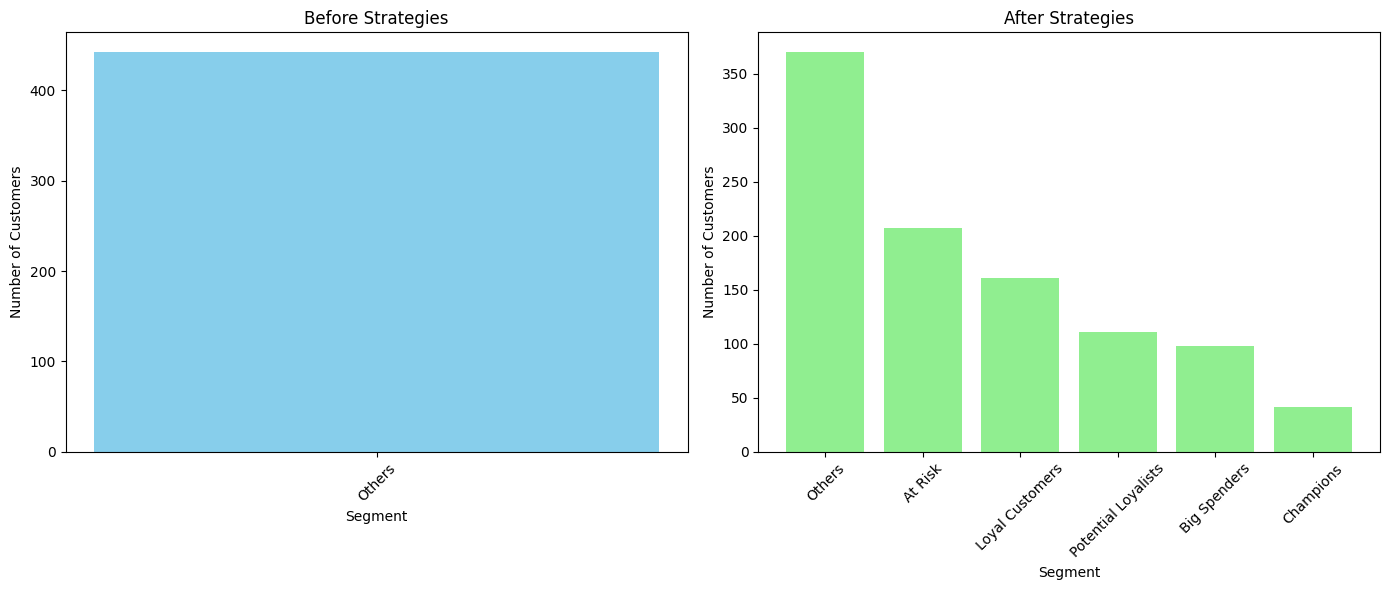

In [41]:
# Merge back with the original RFM data
rfm_data.update(selected_customers)

# Count of customers in each segment after strategies
segment_counts_after = rfm_data['Segment'].value_counts()

# Plot segment counts before and after
fig, ax = plt.subplots(1, 2, figsize=(14, 6))

# Before strategies
segment_counts_before = others_segment['Segment'].value_counts()
ax[0].bar(segment_counts_before.index, segment_counts_before.values, color='skyblue')
ax[0].set_title('Before Strategies')
ax[0].set_xlabel('Segment')
ax[0].set_ylabel('Number of Customers')
ax[0].set_xticklabels(segment_counts_before.index, rotation=45)

# After strategies
ax[1].bar(segment_counts_after.index, segment_counts_after.values, color='lightgreen')
ax[1].set_title('After Strategies')
ax[1].set_xlabel('Segment')
ax[1].set_ylabel('Number of Customers')
ax[1].set_xticklabels(segment_counts_after.index, rotation=45)

plt.tight_layout()
plt.show()
